# Explanation of dataset

This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

1. **Age:** Patients Age in years (Numeric)

2. **Sex:** Gender (Male : 1; Female : 0) (Nominal)


3. **cp:** Type of chest pain experienced by patient. This term categorized into 4 category. 0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)


4. **trestbps:** patient's level of blood pressure at resting mode in mm/HG (Numerical)


5. **chol:** Serum cholesterol in mg/dl (Numeric)


6. **fbs:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

7. **restecg:** Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)


8. **thalach:** Maximum heart rate achieved (Numeric)
exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)

9. **exang:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)


10. **oldpeak:** Exercise induced ST-depression in relative with the state of rest (Numeric)


11. **slope:** ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)


12. **ca:** The number of major vessels (0–3)(nominal)


13. **thal:** A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3: reversible defect (a blood flow is observed but it is not normal(nominal))


14. **target:** It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.


Source:

https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland/data

**Acknowledgements**

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

# Import requirements

In [83]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Dataset  

In [84]:
import pandas as pd

df = pd.read_csv("Heart_disease_cleveland_new.csv")

df.head()

# df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


#**Exploring Statistics**

**Sex**

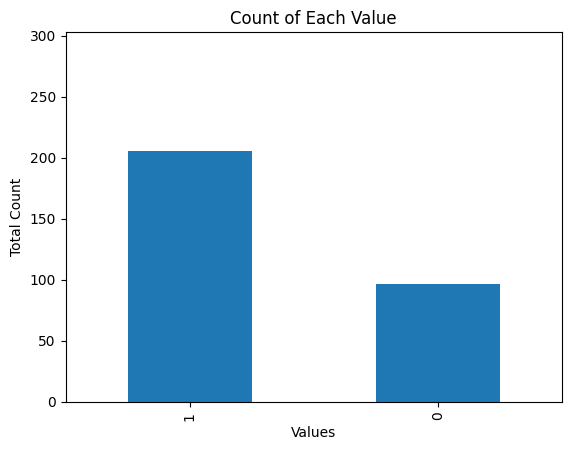

In [85]:
# Men to female ratio


male = df["sex"].value_counts()[1]
female = df["sex"].value_counts()[0]

value_count = df["sex"].value_counts()

value_count.plot(kind='bar')

total_count = len(df)
plt.ylim(0, total_count)

# Label the plot
plt.xlabel('Values')
plt.ylabel('Total Count')
plt.title('Count of Each Value')

plt.show()


**Age**

Average age in dataset: 54.43894389438944


<Axes: xlabel='age', ylabel='Count'>

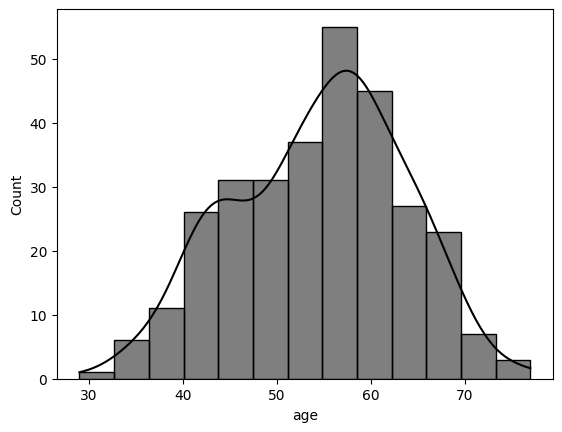

In [86]:
mean_value = df['age'].mean()
print("Average age in dataset:", mean_value)


sns.histplot(df['age'], kde=True, color='black', edgecolor='black')

**CP - Chest pain**

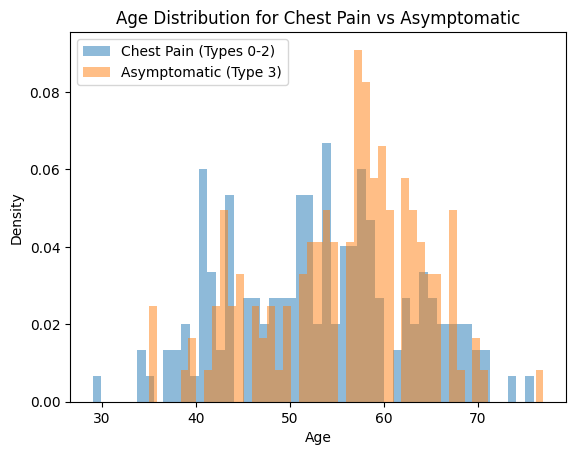

In [87]:
# Chest pain relative to age

chest_pain = df[df['cp'].isin([0, 1, 2])]['age']  # All types of chest pain (0-2)
asymptomatic = df[df['cp'] == 3]['age']  # Asymptomatic (no chest pain)

# Plot histograms
plt.hist(chest_pain, bins=50, alpha=0.5, label='Chest Pain (Types 0-2)', density=True)
plt.hist(asymptomatic, bins=50, alpha=0.5, label='Asymptomatic (Type 3)', density=True)

# Add title and labels
plt.title('Age Distribution for Chest Pain vs Asymptomatic')
plt.xlabel('Age')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Predictions

**Logistic regression**

In [88]:
X = df.drop(["target"], axis=1)
# X = df[["age", "cp"]]

y = df[["target"]]
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(conf_matrix)
print("_____________")
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Confusion matrix:
[[116  13]
 [ 32  82]]
_____________
Precision: 0.8631578947368421
Recall: 0.7192982456140351
F1 Score: 0.784688995215311


**Plot: Logistic regression**

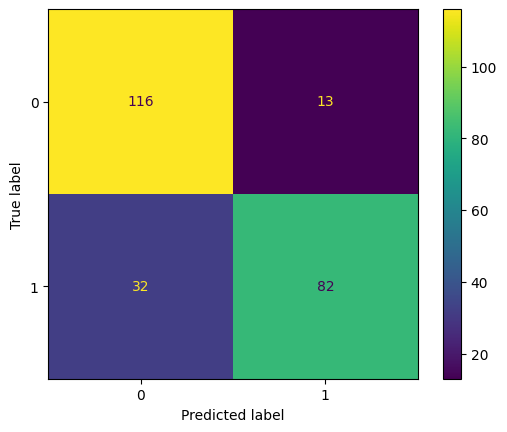

In [89]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)

disp.plot()

AUC: 0.9165714285714286
AUC: 0.9054807561539507


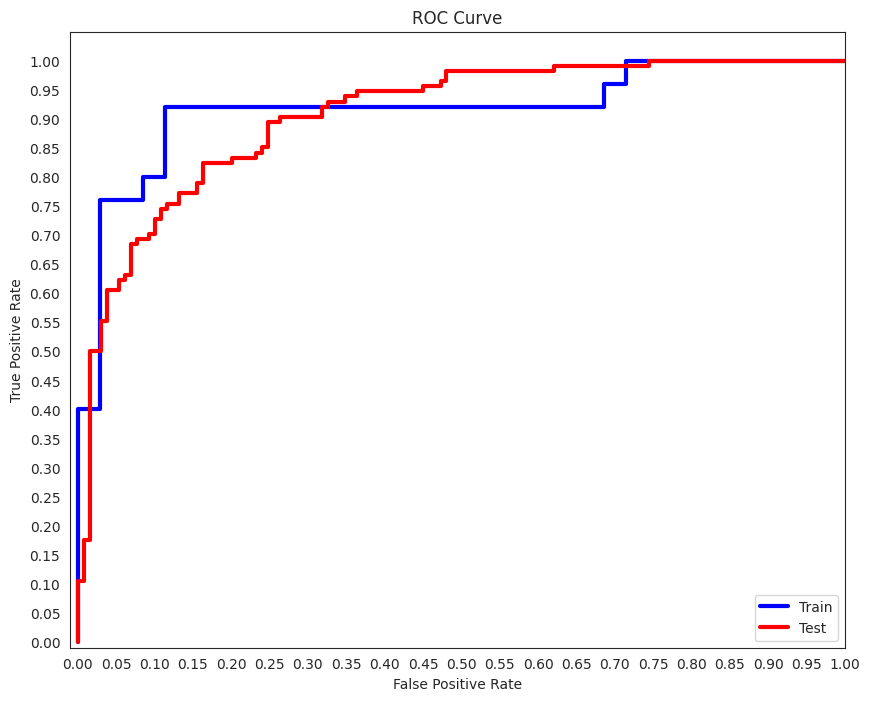

In [90]:
# Calculate the probability scores of each point in the training set
y_train_score = log_reg.predict_proba(X_train)[:,1]
# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = metrics.roc_curve(np.array(y_train), np.array(y_train_score))
# Calculate the probability scores of each point in the test set
y_score = log_reg.predict_proba(X_test)[:,1]
# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, y_score)

# Seaborn Style
sns.set_style('white')
# Train ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(train_fpr, train_tpr, color='blue',
         lw=3, label='Train')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
print('AUC: {}'.format(metrics.auc(train_fpr, train_tpr)))


# Seaborn Style
sns.set_style('white')
# Test ROC Curve
# plt.figure(figsize=(10, 8))
plt.plot(test_fpr, test_tpr, color='red',
         lw=3, label='Test')

plt.legend(loc='lower right')
print('AUC: {}'.format(metrics.auc(test_fpr, test_tpr)))
# plt.show()




plt.show()

**SVC**

In [91]:
X = df.drop(["target"], axis=1)

y = df[["target"]]
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

scaler = MinMaxScaler()

svm = SVC()
# svm_clf = SVC(kernel='rbf', gamma='scale', C=1)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cnf_matrix)
print("___________________")
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Confusion matrix:
[[109   8]
 [ 71  25]]
___________________
Precision: 0.7575757575757576
Recall: 0.2604166666666667
F1 Score: 0.3875968992248062


**Random forest**

In [92]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(cnf_matrix)
print('---------------')
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Confusion matrix
[[97 20]
 [20 76]]
---------------
Precision: 0.7916666666666666
Recall: 0.7916666666666666
F1 Score: 0.7916666666666666
